## TRAIN DATA

In [1]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, datasets
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV

In [2]:
import pandas as pd 
df = pd.read_csv("hospital_train.csv")

In [3]:
df.rename(columns={'17': 'days', "15": "age", "14": "visitors", "13":"severity", "12": "admission type", "0": "id"}, inplace=True)

In [4]:
df.set_index("id", inplace=True)

In [5]:
df


,1,2,3,4,5,6,7,8,9,10,11,admission type,severity,visitors,age,16,days
id,,,,,,,,,,,,,,,,,
161528,6,a,6,X,2,gynecology,R,F,4.0,45810,2.0,Urgent,Moderate,2,21-30,2817.0,0-10
159472,23,a,6,X,4,gynecology,Q,F,2.0,128565,15.0,Trauma,Moderate,4,51-60,4498.0,21-30
309765,2,c,5,Z,2,anesthesia,S,F,3.0,46565,5.0,Urgent,Moderate,2,71-80,4573.0,11-20
279614,32,f,9,Y,3,gynecology,S,B,4.0,124546,6.0,Emergency,Moderate,4,11-20,7202.0,51-60
147791,14,a,1,X,3,gynecology,S,E,2.0,22729,8.0,Urgent,Moderate,2,51-60,3398.0,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237869,12,a,9,Y,3,gynecology,R,B,3.0,82914,3.0,Emergency,Moderate,6,51-60,3966.0,More than 100 Days
254763,28,b,11,X,2,gynecology,R,F,2.0,40026,5.0,Urgent,Moderate,3,21-30,4005.0,51-60
69788,6,a,6,X,3,gynecology,Q,F,3.0,92346,2.0,Trauma,Minor,2,31-40,5215.0,31-40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 161528 to 69647
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   1               100000 non-null  int64  
 1   2               100000 non-null  object 
 2   3               100000 non-null  int64  
 3   4               100000 non-null  object 
 4   5               100000 non-null  int64  
 5   6               100000 non-null  object 
 6   7               100000 non-null  object 
 7   8               100000 non-null  object 
 8   9               99967 non-null   float64
 9   10              100000 non-null  int64  
 10  11              98517 non-null   float64
 11  admission type  100000 non-null  object 
 12  severity        100000 non-null  object 
 13  visitors        100000 non-null  int64  
 14  age             100000 non-null  object 
 15  16              100000 non-null  float64
 16  days            100000 non-null  object 
dtypes: flo

In [7]:
print(set(df["admission type"]))
print(set(df["severity"]))
print(set(df["visitors"]))
print(set(df["age"]))
print(set(df["days"]))

{'Emergency', 'Trauma', 'Urgent'}
{'Extreme', 'Moderate', 'Minor'}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 30, 32}
{'81-90', '31-40', '11-20', '41-50', '21-30', '91-100', '71-80', '0-10', '51-60', '61-70'}
{'81-90', '31-40', '71-80', '11-20', '41-50', '21-30', '91-100', 'More than 100 Days', '51-60', '0-10', '61-70'}


In [6]:
encoder = OrdinalEncoder(categories=[['Trauma', 'Emergency', 'Urgent']])
encoder.fit(df[["admission type"]])
encoded_type = encoder.transform(df[["admission type"]])
df["admission type"] = encoded_type

encoder1 = OrdinalEncoder(categories=[['Minor', 'Moderate', 'Extreme']])
encoder1.fit(df[["severity"]])
encoded_severity = encoder1.transform(df[["severity"]])
df["severity"] = encoded_severity

encoder2 = OrdinalEncoder(categories=[['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100' ]])
encoder2.fit(df[["age"]])
encoded_age = encoder2.transform(df[["age"]])
df["age"] = encoded_age

encoder3 = OrdinalEncoder(categories=[['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', 'More than 100 Days' ]])
encoder3.fit(df[["days"]])
encoded_days = encoder3.transform(df[["days"]])
df["days"] = encoded_days



In [7]:
encoded_days

array([[0.],
       [2.],
       [1.],
       ...,
       [3.],
       [1.],
       [4.]])

In [8]:
encoder3.inverse_transform(encoded_days)

array([['0-10'],
       ['21-30'],
       ['11-20'],
       ...,
       ['31-40'],
       ['11-20'],
       ['41-50']], dtype=object)

In [9]:
df = df[["admission type", "severity", "visitors", "age", "days"]]
df

,admission type,severity,visitors,age,days
id,,,,,
161528,2.0,1.0,2,2.0,0.0
159472,0.0,1.0,4,5.0,2.0
309765,2.0,1.0,2,7.0,1.0
279614,1.0,1.0,4,1.0,5.0
147791,2.0,1.0,2,5.0,5.0
...,...,...,...,...,...
237869,1.0,1.0,6,5.0,10.0
254763,2.0,1.0,3,2.0,5.0
69788,0.0,0.0,2,3.0,3.0


<AxesSubplot:>

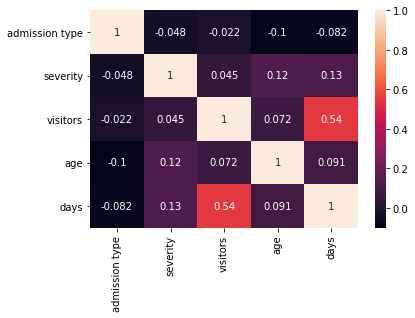

In [11]:
import seaborn as sns 
sns.heatmap(df.corr(), annot=True)

In [10]:
X = df.drop("days", axis=1)
y = df["days"]

### TRAIN, TEST SPLIT

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 666)

### ESTIMATORS


In [14]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10)
cart = DecisionTreeClassifier()
num_trees = 100

model = BaggingClassifier(base_estimator = cart,
                         n_estimators = num_trees,
                         random_state = 235)

res_bg = model_selection.cross_val_score(model, X_train, y_train, cv=kfold).mean()

In [15]:
from sklearn.ensemble import RandomForestClassifier

num_trees = 100
max_features = 3
model = RandomForestClassifier(n_estimators = num_trees, max_features = max_features)
res_rfc = model_selection.cross_val_score(model, X_train, y_train, cv=kfold).mean()

In [16]:
from sklearn.ensemble import AdaBoostClassifier

num_trees = 30

model = AdaBoostClassifier(n_estimators = num_trees, random_state=235)
res_abc = model_selection.cross_val_score(model, X_train, y_train, cv=kfold).mean()

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

num_trees = 100

model = GradientBoostingClassifier(n_estimators = num_trees, random_state=235)
res_gbc = model_selection.cross_val_score(model, X_train, y_train, cv=kfold).mean()

In [19]:
resul = [ res_gbc, res_abc, res_rfc, res_bg]
algori = [ "GradientBoosting", "Ada Boost", "Random Forest", "Bagging DT"]

resultados = pd.Series(resul, algori).sort_values(ascending=False)
resultados

GradientBoosting    0.342225
Bagging DT          0.336950
Random Forest       0.336850
Ada Boost           0.335425
dtype: float64

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
max_depth=1, random_state=240).fit(X_train, y_train)

In [18]:
y_pred = boosting.predict(X_test)

In [20]:
boosting.score(X_train, y_train)

0.3191

In [21]:
boosting.score(X_test, y_test)

0.3175

In [26]:
import pickle
filename = 'finished_model.sav'
pickle.dump(boosting, open(filename, 'wb'))

## TEST

In [27]:
df = pd.read_csv("hospital_test.csv")
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,314114,19,a,7,Y,4,gynecology,S,C,2.0,59278,8.0,Emergency,Minor,2,41-50,4778.0
1,208989,15,c,5,Z,3,gynecology,S,F,2.0,102253,15.0,Trauma,Moderate,3,31-40,5734.0
2,305872,17,e,1,X,4,gynecology,R,E,4.0,5828,4.0,Emergency,Minor,3,71-80,5064.0
3,266099,3,c,3,Z,4,TB & Chest disease,R,A,2.0,56642,9.0,Urgent,Extreme,4,31-40,3254.0
4,13228,6,a,6,X,4,gynecology,R,F,1.0,116266,8.0,Emergency,Minor,3,21-30,4639.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133739,318155,18,d,13,Y,6,anesthesia,Q,B,3.0,123269,25.0,Urgent,Minor,4,51-60,5089.0
133740,144850,27,a,7,Y,2,gynecology,S,C,2.0,1293,8.0,Emergency,Moderate,3,61-70,6713.0
133741,180676,16,c,3,Z,3,gynecology,R,A,3.0,112921,5.0,Trauma,Minor,3,31-40,5326.0
133742,39933,28,b,11,X,4,gynecology,R,F,2.0,585,2.0,Trauma,Extreme,2,31-40,7072.0


In [28]:
df.rename(columns={'17': 'days', "15": "age", "14": "visitors", "13":"severity", "12": "admission type", "0": "id"}, inplace=True)
df.set_index("id", inplace=True)
df

,1,2,3,4,5,6,7,8,9,10,11,admission type,severity,visitors,age,16
id,,,,,,,,,,,,,,,,
314114,19,a,7,Y,4,gynecology,S,C,2.0,59278,8.0,Emergency,Minor,2,41-50,4778.0
208989,15,c,5,Z,3,gynecology,S,F,2.0,102253,15.0,Trauma,Moderate,3,31-40,5734.0
305872,17,e,1,X,4,gynecology,R,E,4.0,5828,4.0,Emergency,Minor,3,71-80,5064.0
266099,3,c,3,Z,4,TB & Chest disease,R,A,2.0,56642,9.0,Urgent,Extreme,4,31-40,3254.0
13228,6,a,6,X,4,gynecology,R,F,1.0,116266,8.0,Emergency,Minor,3,21-30,4639.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318155,18,d,13,Y,6,anesthesia,Q,B,3.0,123269,25.0,Urgent,Minor,4,51-60,5089.0
144850,27,a,7,Y,2,gynecology,S,C,2.0,1293,8.0,Emergency,Moderate,3,61-70,6713.0
180676,16,c,3,Z,3,gynecology,R,A,3.0,112921,5.0,Trauma,Minor,3,31-40,5326.0


In [29]:
encoder = OrdinalEncoder(categories=[['Trauma', 'Emergency', 'Urgent']])
encoder.fit(df[["admission type"]])
encoded_type = encoder.transform(df[["admission type"]])
df["admission type"] = encoded_type

encoder1 = OrdinalEncoder(categories=[['Minor', 'Moderate', 'Extreme']])
encoder1.fit(df[["severity"]])
encoded_severity = encoder1.transform(df[["severity"]])
df["severity"] = encoded_severity

encoder2 = OrdinalEncoder(categories=[['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100' ]])
encoder2.fit(df[["age"]])
encoded_age = encoder2.transform(df[["age"]])
df["age"] = encoded_age

In [30]:
X_pred = df[["admission type", "severity", "visitors", "age"]]

In [31]:
predictions_submit = boosting.predict(X_pred)
predictions_submit

array([1., 2., 1., ..., 2., 2., 2.])

In [32]:
df.index

Int64Index([314114, 208989, 305872, 266099,  13228, 181868, 306919, 281736,
            102076, 294069,
            ...
            296167, 190912, 225943, 225880, 173771, 318155, 144850, 180676,
             39933, 116673],
           dtype='int64', name='id', length=133744)

In [33]:
predictions = pd.DataFrame({"id": df.index, "days": predictions_submit})
predictions.set_index("id", inplace=True)

In [56]:
predictions["days"] = predictions["days"].astype("object")

In [57]:
predictions["days"].dtype

dtype('O')

In [58]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133744 entries, 314114 to 116673
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   days    133744 non-null  object
dtypes: object(1)
memory usage: 6.1+ MB


In [59]:
predictions["days"].replace({"0.0" : '0-10', "1.0": '11-20', "2.0":'21-30', "3.0": '31-40', "4.0": '41-50', "5.0": '51-60', "6.0": '61-70', "7.0":'71-80', "8.0": '81-90', "9.0": '91-100', "10.0": 'More than 100 Days'}, inplace=True)

In [60]:
predictions

,days
id,
314114,1.0
208989,2.0
305872,1.0
266099,1.0
13228,1.0
...,...
318155,1.0
144850,2.0
180676,2.0
